## Dummy variables 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [25]:
raw_data = pd.read_csv('1.03. Dummies.csv')

In [26]:
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [27]:
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [28]:
data = raw_data.copy()

In [29]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [30]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [31]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [32]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           2.19e-15
Time:                        20:33:59   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


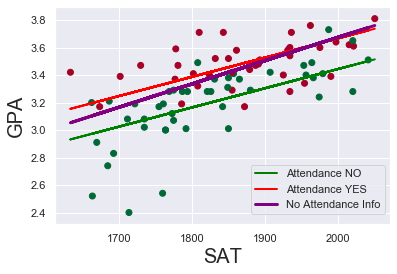

In [34]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
yhat = 0.275 + 0.0017 * data['SAT']

# fig = plt.plot(data['SAT'], yhat_no, lw=2, c="#006837")
# fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='#a50026')
fig_no = plt.plot(data['SAT'], yhat_no, lw=2, c="green",label='Attendance NO' )
fig_yes = plt.plot(data['SAT'], yhat_yes, lw=2, c='red', label='Attendance YES')
fig = plt.plot(data['SAT'], yhat, lw=3, c='purple', label='No Attendance Info')

plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)

# plt.legend(loc='lower right')     # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc='best', bbox_to_anchor=(1, 0.3))     # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

plt.show()

## Make predictions

In [44]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [45]:
new_data.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [46]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [50]:
predictions_df = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictions_df)
joined.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.04311
Alice,1,1670,1,2.97312


In [51]:
data_test = pd.DataFrame({'const':1, 'SAT':data['SAT'], 'Attendnace':data['Attendance']})
#data_test2 = data_test2['const', 'SAT', 'Attendance']
data_test2 = data_test[:10]
#data_test2
predictions = results.predict(data_test2)
predictions


0    3.043110
1    2.973120
2    3.107501
3    3.002516
4    3.013715
5    2.981519
6    3.113100
7    3.113100
8    3.152295
9    3.233483
dtype: float64

In [53]:
predictions_df2 = pd.DataFrame({'Predictions':predictions})
data_1st_10 = data[:10]
joined = data_1st_10.join(predictions_df2)
joined

,SAT,GPA,Attendance,Predictions
0,1714,2.40,0,3.043110
1,1664,2.52,0,2.973120
2,1760,2.54,0,3.107501
3,1685,2.74,0,3.002516
4,1693,2.83,0,3.013715
5,1670,2.91,0,2.981519
6,1764,3.00,0,3.113100
7,1764,3.00,0,3.113100
8,1792,3.01,0,3.152295
9,1850,3.01,0,3.233483


## Real estate exercise

In [17]:
raw_data2 = pd.read_csv('real_estate_price_size_year_view.csv')
raw_data2.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [18]:
raw_data.describe(include='all')

,SAT,GPA,Attendance
count,84.000000,84.000000,84
unique,NaN,NaN,2
top,NaN,NaN,No
freq,NaN,NaN,45
mean,1845.273810,3.330238,NaN
std,104.530661,0.271617,NaN
min,1634.000000,2.400000,NaN
25%,1772.000000,3.190000,NaN
50%,1846.000000,3.380000,NaN
75%,1934.000000,3.502500,NaN


### Create a dummy variable for "view"

In [19]:
data2 = raw_data2.copy()
data2['view'] = data2['view'].map({'No sea view':0, 'Sea view':1})

In [20]:
data2.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


## Declare dependent and independent variables

In [21]:
y = data2['price']
x1 = data2[['size', 'year', 'view']]

## Regression 

In [22]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           1.02e-50
Time:                        20:32:56   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# example to add a column 
data2['predicted_price'] = -5.398e+06 + 223.0316 * data2['size'] + 2718.9489 * data2['year'] + 5.673e+04 * data2['view']